<a href="https://colab.research.google.com/github/Kaushikeeb/Exploratory_data_analysis/blob/main/Da-1-Exploratory_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  object 
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  awards_won            54807 non-null  float64
 11  avg_training_score    52247 non-null  float64
 12  is_promoted           54808 non-null  object 
dtypes: float64(3), int64(3), object(7)
memory usage: 5.4+ MB

Summary Statistics:
         employee_id         department    

<ipython-input-3-519dd9d4b7a8>:36: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['previous_year_rating'].fillna(df['previous_year_rating'].mean(), inplace=True)
<ipython-input-3-519dd9d4b7a8>:39: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].meth

DataFrame after binning 'age':
     age age_group
0  35.0     30-40
1  30.0     30-40
2  34.0     30-40
3  39.0     30-40
4  45.0     40-50
5  31.0     30-40
6  31.0     30-40
7  33.0     30-40
8  28.0     20-30
9  32.0     30-40
Outliers detected:
      employee_id   department    region         education gender  \
42         23560           HR  region_2        Bachelor's      m   
99         51256      Finance  region_2  Master's & above      m   
307        13150  Procurement  region_2  Master's & above      f   
352        69715   Operations  region_2        Bachelor's      f   
435        57893   Technology  region_2        Bachelor's      f   

    recruitment_channel  no_of_trainings   age  previous_year_rating  \
42             sourcing                1  59.0                   4.0   
99                other                1  60.0                   5.0   
307               other                1  58.0                   1.0   
352               other                1  58.0       

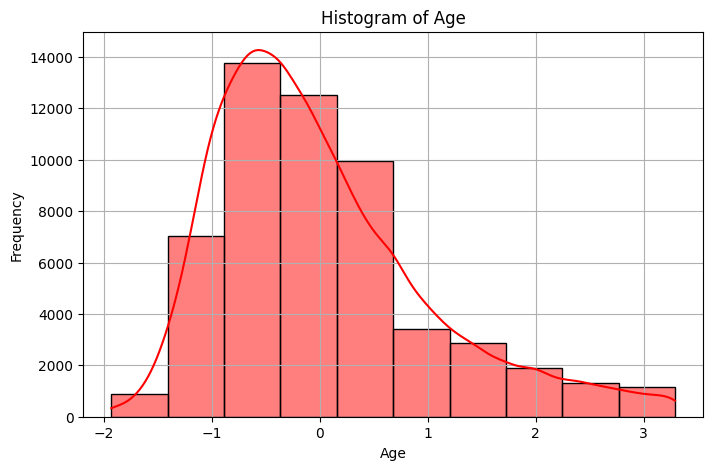

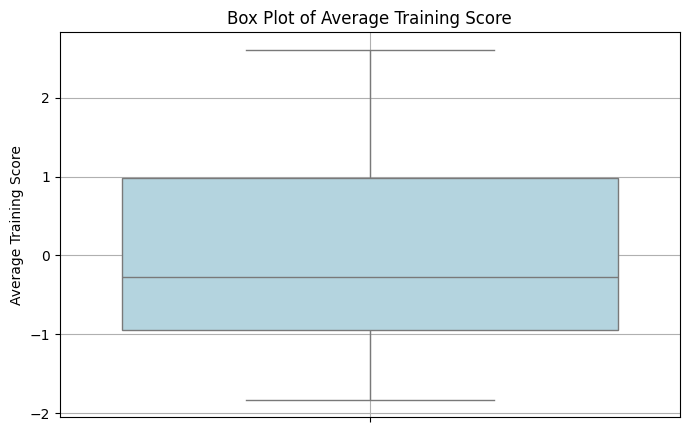

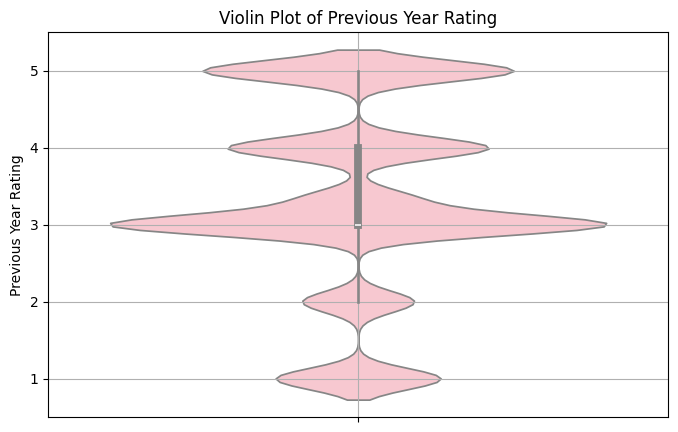

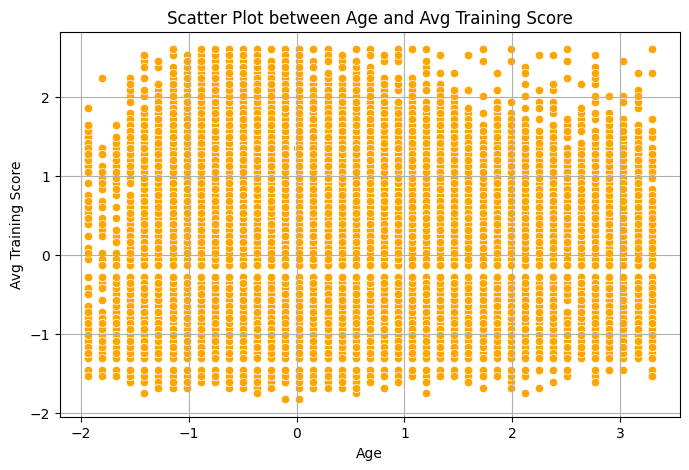

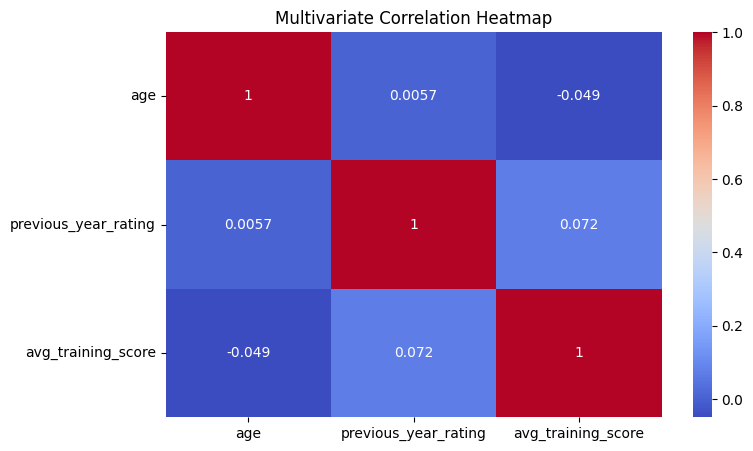

Mean of Average Training Score: -3.116367789527187e-16
Median of Average Training Score: -0.2745435725292234
Mode of Average Training Score: -1.0140853331041035
Quartiles of Average Training Score:
 0.25   -0.940131
0.50   -0.274544
0.75    0.982677
Name: avg_training_score, dtype: float64
Deciles of Average Training Score:
 0.1   -1.161994
0.2   -1.014085
0.3   -0.792223
0.4   -0.496406
0.5   -0.274544
0.6    0.169181
0.7    0.612907
0.8    1.204540
0.9    1.500357
Name: avg_training_score, dtype: float64
Quantiles of Average Training Score (10th and 90th):
 0.1   -1.161994
0.9    1.500357
Name: avg_training_score, dtype: float64
Range of Average Training Score: 4.437250563449281
Variance of Average Training Score: 1.0000191402213254
Standard Deviation of Average Training Score: 1.0000095700648697
Interquartile Range (IQR) of Average Training Score: 1.9228085774946884
Skewness of Average Training Score: 0.419128755378491


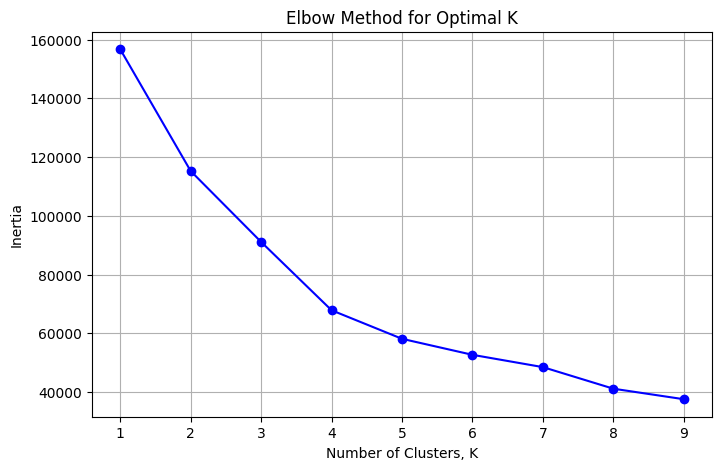

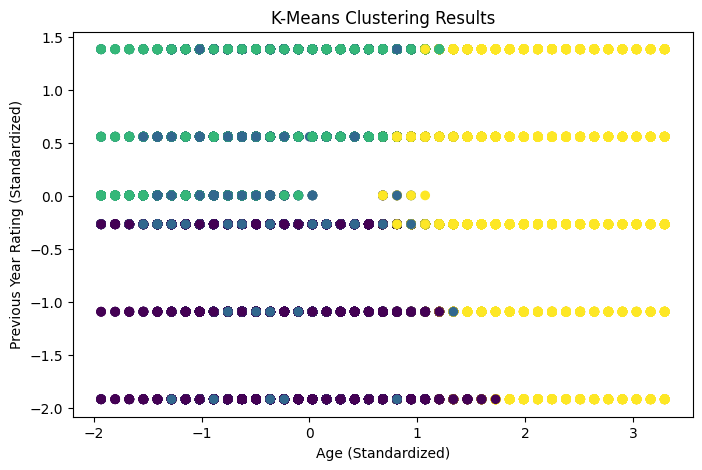

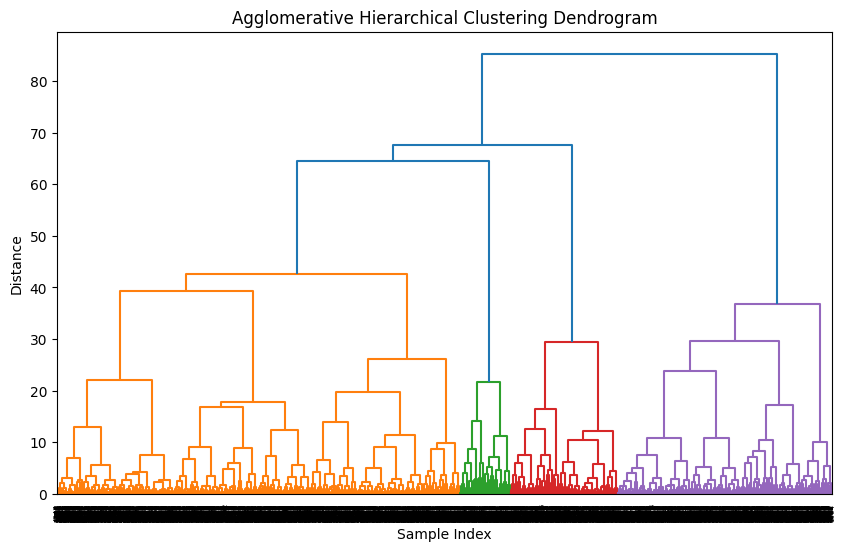

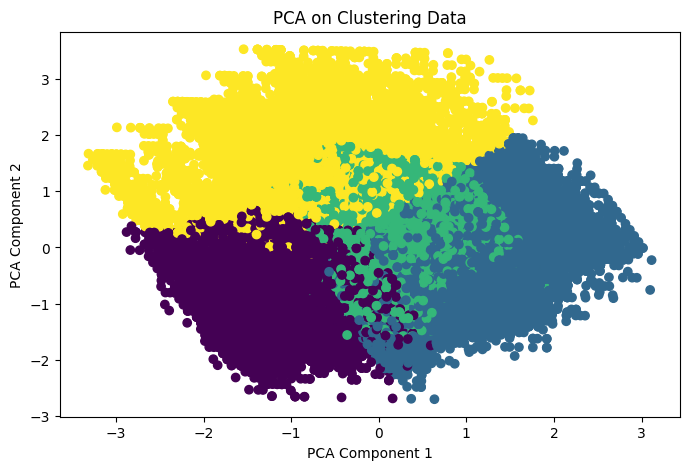

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:310: UserWarning: Array is not symmetric, and will be converted to symmetric by average with its transpose.
  adjacency = check_symmetric(adjacency)


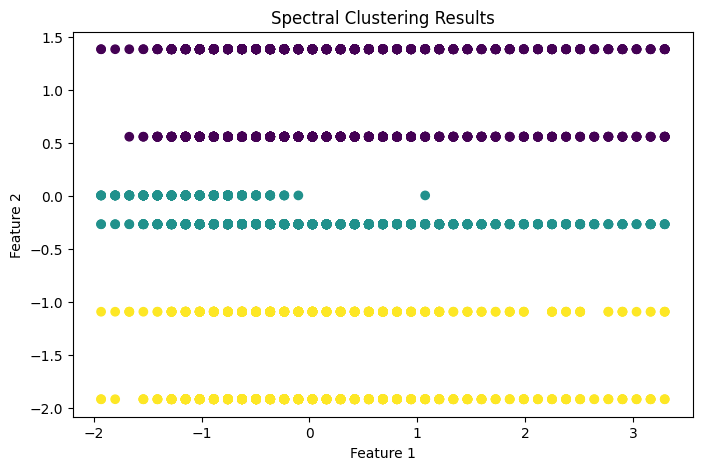

<ipython-input-3-519dd9d4b7a8>:242: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(sampled_data[:, 0], sampled_data[:, 1], cmap='viridis')


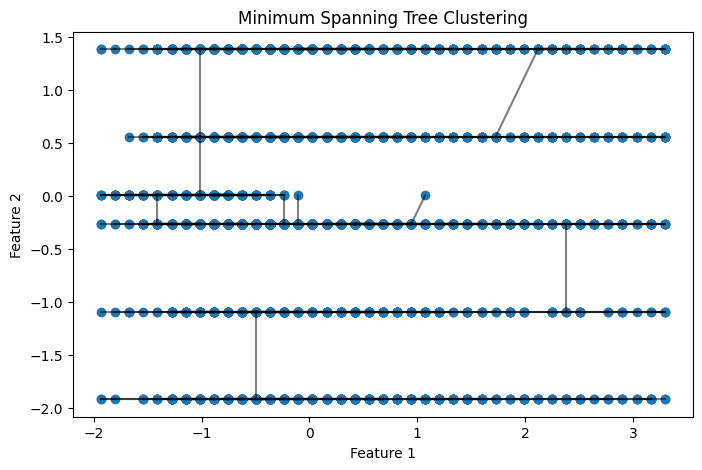

<ipython-input-3-519dd9d4b7a8>:261: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(svd_data[:, 0], svd_data[:, 1], cmap='viridis')


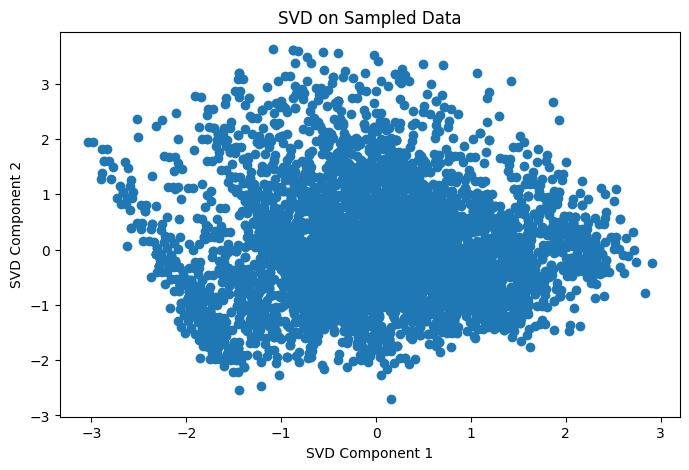

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from scipy import stats
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances
from sklearn.decomposition import PCA
from sklearn.manifold import MDS
import networkx as nx
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.cluster import SpectralClustering
from sklearn.neighbors import kneighbors_graph
from scipy.sparse.csgraph import minimum_spanning_tree

# Loading the dataset
url = 'https://raw.githubusercontent.com/salemprakash/EDA/main/Data/employee_promotion.csv'
df = pd.read_csv(url)

# Displaying the first few rows of the dataset
df.head()

# Displaying info about the dataset
df.info()

# Summary statistics of the dataset
summary = df.describe(include='all')
print("\nSummary Statistics:")
print(summary)

# Handling missing values
# Fill missing values in 'previous_year_rating' with the mean
df['previous_year_rating'].fillna(df['previous_year_rating'].mean(), inplace=True)

# Fill missing values in 'education' with the most frequent value (mode)
df['education'].fillna(df['education'].mode()[0], inplace=True)

# Handling missing values in 'age' by replacing '?' with NaN and filling with the mean
df['age'].replace('?', np.nan, inplace=True)
df['age'] = pd.to_numeric(df['age'], errors='coerce')
df['age'].fillna(df['age'].mean(), inplace=True)

# Discretize 'age' into bins
bins = [20, 30, 40, 50, 60]
labels = ['20-30', '30-40', '40-50', '50-60']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

# Printring the DataFrame after binning 'age'
print("DataFrame after binning 'age':\n", df[['age', 'age_group']].head(10))

# Z-score for detecting outliers
numeric_cols = ['age', 'previous_year_rating', 'avg_training_score']
zscore = df[numeric_cols].apply(stats.zscore).abs()

# Filter rows where any Z-score is greater than 3 (outliers)
outliers = df[(zscore > 3).any(axis=1)]
print("Outliers detected:\n", outliers.head())

# Normalize 'age' and 'avg_training_score' using Min-Max scaling
scaler_min_max = MinMaxScaler()
df[['age', 'avg_training_score']] = scaler_min_max.fit_transform(df[['age', 'avg_training_score']])
print("Data after Min-Max normalization:\n", df[['age', 'avg_training_score']].head())

# Z-score normalization for 'age' and 'avg_training_score'
scaler_z = StandardScaler()
df[['age', 'avg_training_score']] = scaler_z.fit_transform(df[['age', 'avg_training_score']])
print("Data after Z-score normalization:\n", df[['age', 'avg_training_score']].head())

# Decimal scaling for 'no_of_trainings'
df['no_of_trainings_decimal'] = df['no_of_trainings'] / 10**np.ceil(np.log10(df['no_of_trainings'].abs()))
print("Data after Decimal scaling:\n", df[['no_of_trainings', 'no_of_trainings_decimal']].head())

# Visualizations

# Univariate Analysis - Histogram of 'age'
plt.figure(figsize=(8, 5))
sns.histplot(df['age'], bins=10, color='red', kde=True)
plt.title("Histogram of Age")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

# Univariate Analysis - Box Plot for 'avg_training_score'
plt.figure(figsize=(8, 5))
sns.boxplot(y=df['avg_training_score'], color='lightblue')
plt.title("Box Plot of Average Training Score")
plt.ylabel("Average Training Score")
plt.grid(True)
plt.show()

# Univariate Analysis - Violin Plot for 'previous_year_rating'
plt.figure(figsize=(8, 5))
sns.violinplot(y=df['previous_year_rating'], color='pink')
plt.title("Violin Plot of Previous Year Rating")
plt.ylabel("Previous Year Rating")
plt.grid(True)
plt.show()

# Bivariate Analysis - Scatter plot between 'age' and 'avg_training_score'
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['age'], y=df['avg_training_score'], color='orange')
plt.title("Scatter Plot between Age and Avg Training Score")
plt.xlabel("Age")
plt.ylabel("Avg Training Score")
plt.grid(True)
plt.show()

# Multivariate Analysis - Correlation Heatmap for 'age', 'previous_year_rating', and 'avg_training_score'
plt.figure(figsize=(8, 5))
sns.heatmap(df[['age', 'previous_year_rating', 'avg_training_score']].corr(), annot=True, cmap='coolwarm')
plt.title("Multivariate Correlation Heatmap")
plt.show()

mean_avg_training_score = df['avg_training_score'].mean()
print("Mean of Average Training Score:", mean_avg_training_score)


median_avg_training_score = df['avg_training_score'].median()
print("Median of Average Training Score:", median_avg_training_score)


mode_avg_training_score = df['avg_training_score'].mode()[0]
print("Mode of Average Training Score:", mode_avg_training_score)


quartiles = df['avg_training_score'].quantile([0.25, 0.5, 0.75])
print("Quartiles of Average Training Score:\n", quartiles)

deciles = df['avg_training_score'].quantile(np.arange(0.1, 1, 0.1))
print("Deciles of Average Training Score:\n", deciles)

quantiles = df['avg_training_score'].quantile([0.1, 0.9])
print("Quantiles of Average Training Score (10th and 90th):\n", quantiles)


range_avg_training_score = df['avg_training_score'].max() - df['avg_training_score'].min()
print("Range of Average Training Score:", range_avg_training_score)


variance_avg_training_score = df['avg_training_score'].var()
print("Variance of Average Training Score:", variance_avg_training_score)


std_dev_avg_training_score = df['avg_training_score'].std()
print("Standard Deviation of Average Training Score:", std_dev_avg_training_score)

IQR = quartiles[0.75] - quartiles[0.25]
print("Interquartile Range (IQR) of Average Training Score:", IQR)

skewness_avg_training_score = df['avg_training_score'].skew()
print("Skewness of Average Training Score:", skewness_avg_training_score)

# Data preparation for clustering
# Using only numeric columns and scale data
clustering_data = df[['age', 'previous_year_rating', 'avg_training_score']].dropna()
scaler = StandardScaler()
clustering_data = scaler.fit_transform(clustering_data)

#1. K-Means Clustering
# Choosing optimal K using the Elbow method
inertia = []
K = range(1, 10)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(clustering_data)
    inertia.append(kmeans.inertia_)

# Elbow Plot
plt.figure(figsize=(8, 5))
plt.plot(K, inertia, 'bo-', markersize=6)
plt.xlabel('Number of Clusters, K')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.grid(True)
plt.show()

# Apply K-Means with optimal K
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_labels = kmeans.fit_predict(clustering_data)
plt.figure(figsize=(8, 5))
plt.scatter(clustering_data[:, 0], clustering_data[:, 1], c=kmeans_labels, cmap='viridis')
plt.xlabel('Age (Standardized)')
plt.ylabel('Previous Year Rating (Standardized)')
plt.title('K-Means Clustering Results')
plt.show()

# Subsample the data
sampled_data = clustering_data[np.random.choice(clustering_data.shape[0], size=int(0.1 * clustering_data.shape[0]), replace=False)]
kmeans_sampled = KMeans(n_clusters=4, random_state=42)
kmeans_labels_sampled = kmeans.fit_predict(clustering_data)

#2. Hierarchical Clustering (Agglomerative) with Dendrograms
# Agglomerative Hierarchical Clustering
linked = linkage(sampled_data, method='ward')
plt.figure(figsize=(10, 6))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title("Agglomerative Hierarchical Clustering Dendrogram")
plt.xlabel("Sample Index")
plt.ylabel("Distance")
plt.show()

# Additional Analysis - PCA for dimensionality reduction and visualization
pca = PCA(n_components=2)
pca_data = pca.fit_transform(clustering_data)

# Plotting the PCA result
plt.figure(figsize=(8, 5))
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=kmeans_labels, cmap='viridis')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('PCA on Clustering Data')
plt.show()


# --- 1. Spectral Clustering ---
# Create a similarity matrix using k-nearest neighbors
knn_graph = kneighbors_graph(sampled_data, n_neighbors=10, mode='connectivity', include_self=True)
# Apply spectral clustering
spectral = SpectralClustering(n_clusters=3, affinity='precomputed', random_state=42)
spectral_labels = spectral.fit_predict(knn_graph)

# Plot the spectral clustering result
plt.figure(figsize=(8, 5))
plt.scatter(sampled_data[:, 0], sampled_data[:, 1], c=spectral_labels, cmap='viridis')
plt.title('Spectral Clustering Results')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

#  Minimum Spanning Tree (MST)
# Create a distance matrix
distance_matrix = np.linalg.norm(sampled_data[:, None] - sampled_data, axis=2)
# Compute the minimum spanning tree
mst = minimum_spanning_tree(distance_matrix)

# Convert the MST to a graph and plot
plt.figure(figsize=(8, 5))
plt.scatter(sampled_data[:, 0], sampled_data[:, 1], cmap='viridis')
for i in range(len(sampled_data)):
    for j in range(i + 1, len(sampled_data)):
        if mst[i, j] != 0:
            plt.plot([sampled_data[i, 0], sampled_data[j, 0]],
                     [sampled_data[i, 1], sampled_data[j, 1]], 'k-', alpha=0.5)
plt.title('Minimum Spanning Tree Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


# --- 4. Singular Value Decomposition (SVD) ---
# Apply SVD for dimensionality reduction (similar to PCA but with matrix factorization)
svd = TruncatedSVD(n_components=2)
svd_data = svd.fit_transform(sampled_data)

# Plotting the SVD result
plt.figure(figsize=(8, 5))
plt.scatter(svd_data[:, 0], svd_data[:, 1], cmap='viridis')
plt.xlabel('SVD Component 1')
plt.ylabel('SVD Component 2')
plt.title('SVD on Sampled Data')
plt.show()
